<a href="https://colab.research.google.com/github/deepanshgoyal33/dl_models_implementations/blob/master/fashion_mnist_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import helper

In [0]:
import torch
from torchvision import datasets, transforms
import helper
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.FashionMNIST('/home/deepansh/Desktop/pytorch/deep-learning-v2-pytorch/intro-to-pytorch/F_MNIST_data/',
                                 download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('/home/deepansh/Desktop/pytorch/deep-learning-v2-pytorch/intro-to-pytorch/F_MNIST_data/',
                                download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [55]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
images , label = next(iter(trainloader))

--2019-06-06 21:20:27--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.2’

helper.py.2         100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-06-06 21:20:27 (77.9 MB/s) - ‘helper.py.2’ saved [2813/2813]



In [0]:
from torch import nn

In [0]:
model = nn.Sequential(nn.Linear(784,392),
                     nn.ReLU(),
                     nn.Linear(392,196),
                     nn.ReLU(),
                     nn.Linear(196,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1),
                     )

In [58]:
print(model[0].weight)
    

Parameter containing:
tensor([[-3.4415e-02, -1.8509e-02,  1.8460e-02,  ...,  5.1043e-03,
         -1.2071e-02,  2.0403e-02],
        [-2.6284e-02, -2.2215e-02, -8.5168e-05,  ..., -2.6321e-02,
         -2.8743e-02, -3.7224e-03],
        [ 2.3581e-02,  2.1632e-02,  1.2222e-02,  ..., -1.8116e-02,
          3.3671e-02, -2.7502e-03],
        ...,
        [ 4.3138e-03,  3.2214e-02, -3.0565e-02,  ...,  1.6430e-02,
          4.5332e-03,  2.1354e-02],
        [-2.1502e-02, -2.5701e-02, -1.5971e-02,  ...,  1.9878e-02,
          2.4164e-02, -3.4670e-03],
        [ 1.3010e-02, -2.2721e-02,  2.3284e-02,  ...,  2.9648e-02,
         -4.4969e-03, -1.5634e-02]], requires_grad=True)


In [59]:
print(images.shape)
print(label.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [0]:
from torch import optim

In [61]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 5
for e in range(epochs):
  running_loss = 0
  for images,labels in trainloader:
    images = images.view(images.shape[0],-1)
    optimizer.zero_grad()
    logits = model(images)
    loss = criterion(logits,labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
   
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.2390655398940735
Training loss: 0.6082787271311034
Training loss: 0.5138095721507123
Training loss: 0.4640437802240284
Training loss: 0.43555794602263964


In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [63]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/torch/tensor.py:339: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


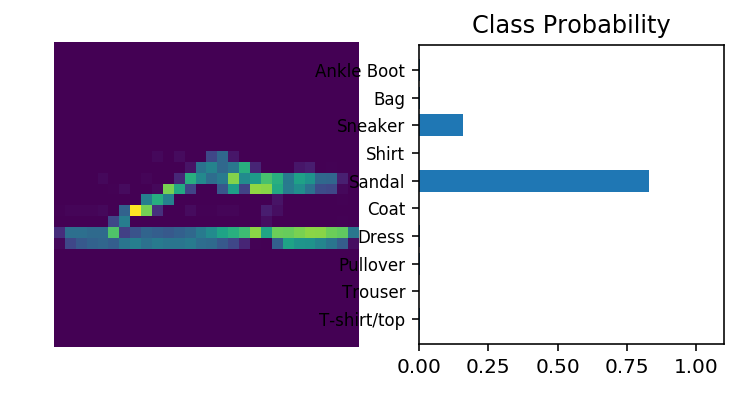

In [64]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import helper

detaiter = next(iter(testloader))
img = images[1]
img = img.resize(1,784)
ps = torch.exp(model(img))
view_classify(img,ps,version='Fashion')

